In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 3

In [2]:
def get_average_lower_bound(m, c, range_r=None, n_experiments=1000, ordered=False):
    range_ratios = []
    ratios = []
    
    for _ in range(n_experiments):
        # Force r_1 to be larger than r_m
        if range_r is not None:
            ranges = np.random.uniform(0, 1, size=m - 1)
            if ordered:
                ranges = np.sort(ranges)[::-1]
            
            r_1 = ranges[-1] * range_r
            ranges = np.array([r_1] + list(ranges))
        else:
            ranges = np.random.uniform(0, 1, size=m)
            if ordered:
                ranges = np.sort(ranges)[::-1]
        
        ranges = ranges / ranges.sum()  # normalize so that the sum is 1
        
        leftpoints = np.array(
            [0] + [ranges[: i].sum() for i in range(1, len(ranges))]
        )
        
        add_term = (c + 1) / (2 * c) * ranges.sum() + (m + 1 / c) * leftpoints.sum()
        
        ratios.append(
            (ranges[:-1].dot(np.arange(m - 1, 0, -1)) + add_term)
            / (ranges[1:].dot(np.arange(1, m)) + add_term)
        )
        
        range_ratios.append(ranges[0] / ranges[-1])
    
    return ratios, range_ratios


def get_average_lower_bound_from_ranges(ranges, m, c):
    ranges = ranges / ranges.sum()
    leftpoints = np.array(
        [0] + [ranges[: i].sum() for i in range(1, len(ranges))]
    )
    
    add_term = (c + 1) / (2 * c) * ranges.sum() + (m + 1 / c) * leftpoints.sum()
    
    return (ranges[:-1].dot(np.arange(m - 1, 0, -1)) + add_term) \
           / (ranges[1:].dot(np.arange(1, m)) + add_term)


# Same capacity constraint
def get_pof_upper_bound(ranges, m, c):
    ranges = ranges / ranges.sum()
    if np.any(ranges < 0):
        print('Overflow')
        return
    
    leftpoints = np.array(
        [0] + [ranges[: i].sum() for i in range(1, len(ranges))]
    )
    
    add_term1 = (c + 1) / (2 * c) * ranges.sum()
    add_term2 = (m + 1 / c) * leftpoints.sum()
    
    return (
        ranges[:-1].dot(np.arange(m - 1, 0, -1))
        + add_term1 + add_term2
    ) / add_term2

In [60]:
N = 3628800
N_EXPERIMENTS = 1000

ms = []
ratio_population = []
range_ratio_population = []

for m in range(2, 20):
    if N % m == 0:
        ratios, range_ratios = get_average_lower_bound(
            m, N // m, n_experiments=N_EXPERIMENTS, ordered=True
        )
        ratio_population.append(ratios)
        range_ratio_population.append(range_ratios)
        
        ms.append(m)

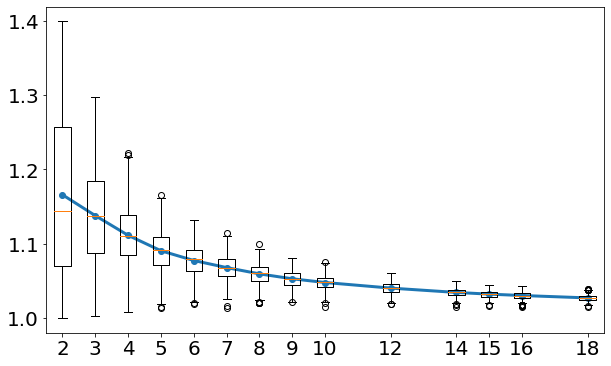

In [61]:
mean_ratios = [np.mean(ratios) for ratios in ratio_population]

plt.plot(ms, mean_ratios)
plt.scatter(ms, mean_ratios)
plt.boxplot(ratio_population, positions=ms)

plt.show()

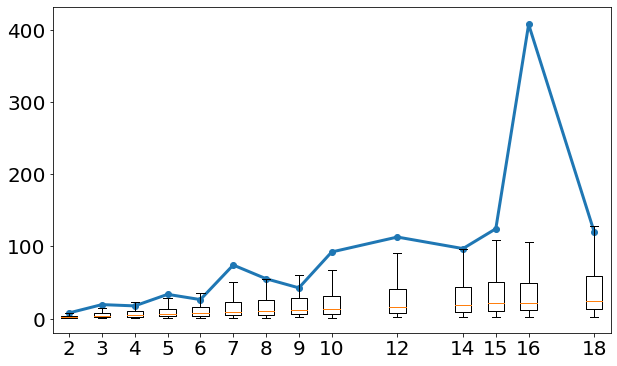

In [62]:
mean_range_ratios = [
    np.mean(range_ratios) for range_ratios in range_ratio_population
]

plt.plot(ms, mean_range_ratios)
plt.scatter(ms, mean_range_ratios)
plt.boxplot(range_ratio_population, positions=ms, showfliers=False)

plt.show()

# Forced ratio

In [3]:
N = 3628800
N_EXPERIMENTS = 1000

ms = []
ratio_population = []
range_ratio_population = []

for m in range(2, 20):
    if N % m == 0:
        ratios, range_ratios = get_average_lower_bound(
            m, N // m, range_r=100, n_experiments=N_EXPERIMENTS, ordered=True
        )
        ratio_population.append(ratios)
        range_ratio_population.append(range_ratios)
        
        ms.append(m)

NameError: name 'get_average_lower_bound' is not defined

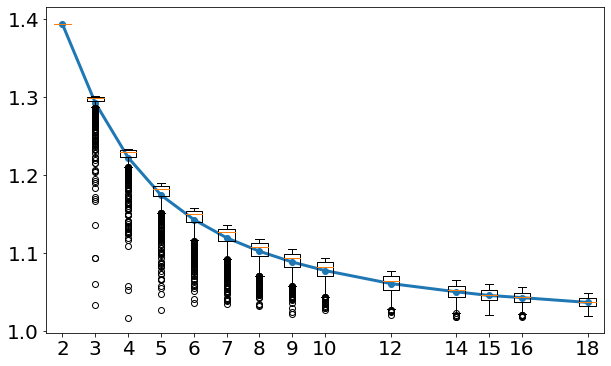

In [67]:
mean_ratios = [np.mean(ratios) for ratios in ratio_population]

plt.plot(ms, mean_ratios)
plt.scatter(ms, mean_ratios)
plt.boxplot(ratio_population, positions=ms)

plt.show()

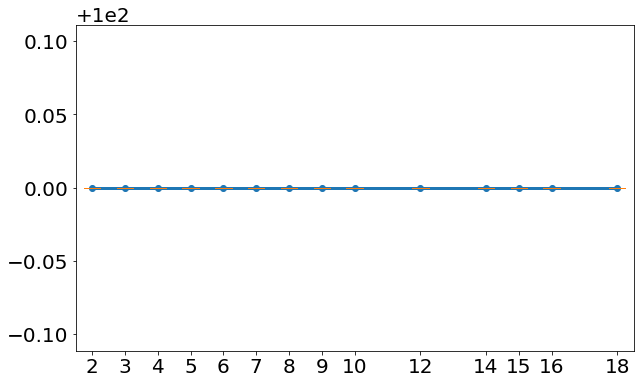

In [68]:
mean_range_ratios = [
    np.mean(range_ratios) for range_ratios in range_ratio_population
]

plt.plot(ms, mean_range_ratios)
plt.scatter(ms, mean_range_ratios)
plt.boxplot(range_ratio_population, positions=ms, showfliers=False)

plt.show()

# Upper-bound

In [5]:
N = 3628800
m = 8

get_pof_upper_bound(np.arange(m, 0, -1), m, N // m)

1.1383928485311972

# Arithmetic ranges

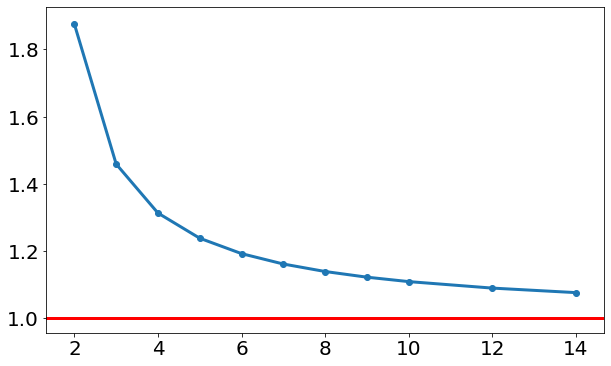

In [21]:
N = 3628800
ms = []
bounds = []

for m in range(2, 15):
    if N % m == 0:
        bounds.append(
            get_pof_upper_bound(np.arange(m, 0, -1), m, N // m)
        )
        ms.append(m)
        
plt.plot(ms, bounds)
plt.scatter(ms, bounds)

plt.axhline(1, c='r')

plt.show()

# Geometric ranges

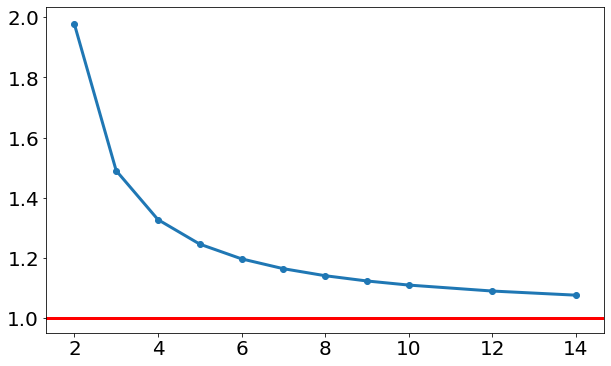

In [22]:
N = 3628800
ms = []
bounds = []

for m in range(2, 15):
    if N % m == 0:
        bounds.append(
            get_pof_upper_bound(1.1 ** np.arange(m, 0, -1), m, N // m)
        )
        ms.append(m)
        
plt.plot(ms, bounds)
plt.scatter(ms, bounds)

plt.axhline(1, c='r')

plt.show()

# Some of the ranges are zero

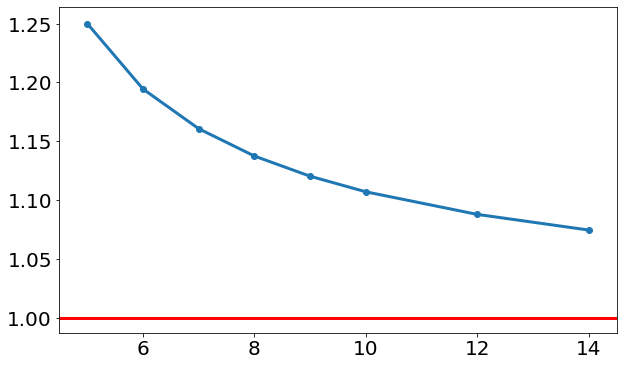

In [30]:
N = 3628800
ms = []
bounds = []

n_non_zero_ranges = 5

for m in range(max(2, n_non_zero_ranges), 15):
    # n_non_zero_ranges = m // 2
    
    if N % m == 0:
        bounds.append(
            get_pof_upper_bound(
                np.array([1 / n_non_zero_ranges] * n_non_zero_ranges + [0] * (m - n_non_zero_ranges)),
                m, N // m
            )
        )
        ms.append(m)
        
plt.plot(ms, bounds)
plt.scatter(ms, bounds)

plt.axhline(1, c='r')

plt.show()

# Scratch paper

In [5]:
N = 3628800
m = 8

get_average_lower_bound_from_ranges(np.arange(m, 0, -1), m, N // m)

1.058091269833683

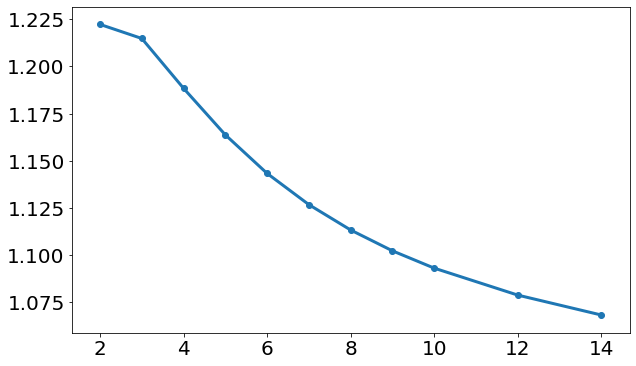

In [38]:
N = 3628800
ms = []
bounds = []

for m in range(2, 15):
    if N % m == 0:
        bounds.append(
            get_average_lower_bound_from_ranges(3 ** np.arange(m, 0, -1), m, N // m)
        )
        ms.append(m)
    
plt.plot(ms, bounds)
plt.scatter(ms, bounds)
plt.show()

__Note:__ It seems that the inflection point of the curve gets larger as the base gets closer to 1.

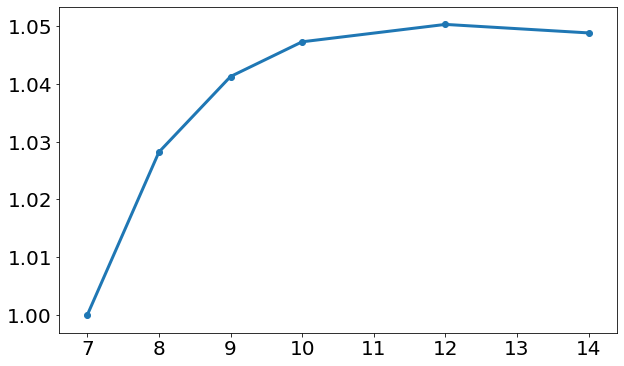

In [51]:
N = 3628800
ms = []
bounds = []

n_non_zero_ranges = 7

for m in range(max(2, n_non_zero_ranges), 15):
    if N % m == 0:
        bounds.append(
            get_average_lower_bound_from_ranges(
                np.array([1 / n_non_zero_ranges] * n_non_zero_ranges + [0] * (m - n_non_zero_ranges)),
                m, N // m
            )
        )
        ms.append(m)
    
plt.plot(ms, bounds)
plt.scatter(ms, bounds)
plt.show()